### Source code tutorial: https://youtu.be/7sz4WpkUIIs?t=509

# Support Vector Machines

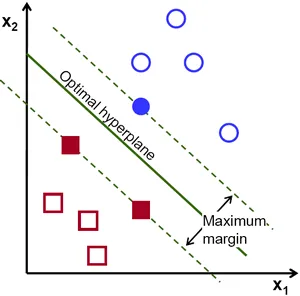 

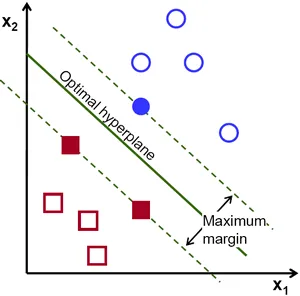

Photo Credit: https://towardsdatascience.com/

- Useful for classifying data points in a N- dimensional space

# 1) Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

# 2) Read csv file

In [3]:
pd_migrane = pd.read_csv("migrane_data.csv")
pd_migrane.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


### 2a) Need to make dictionary for target

In [4]:
# find all unique values under "type"
dif_migrane = pd_migrane["Type"].unique()

dif_migrane

array(['Typical aura with migraine', 'Migraine without aura',
       'Basilar-type aura', 'Sporadic hemiplegic migraine',
       'Familial hemiplegic migraine', 'Other',
       'Typical aura without migraine'], dtype=object)

In [5]:
#Create dictionary to turn labels to values

migrane_labels_to_numbers = {
    
    "Typical aura with migraine" : 1,
    "Migraine without aura" : 2,
    "Basilar-type aura" : 3,
    "Sporadic hemiplegic migraine": 4,
    "Familial hemiplegic migraine" : 5,
    "Typical aura without migraine" : 6,
    "Other" : 7
    
}

#relabel each list of labels to values
pd_migrane["Type"] = pd_migrane["Type"].map(migrane_labels_to_numbers)

#make updated csv
pd_migrane.to_csv("migrane_dataMod.csv", index = False)

#open new csv

pd_mod_migrane = pd.read_csv("migrane_dataMod.csv").head()

pd_mod_migrane

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,1
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,1
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,1


# 3) Analyzing Dataset

## 3a) View Distribution of Labels

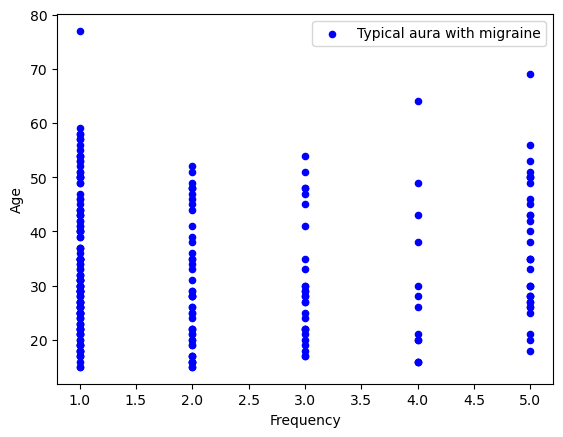

In [18]:
# help(Typical_aura_with_migraine.plot)
pd_mod_migrane = pd.read_csv("migrane_dataMod.csv")

migraine1_df = pd_mod_migrane[pd_mod_migrane["Type"]==1]

axes = migraine1_df.plot(kind = "scatter", x = "Frequency", y = "Age",
                                         color = "blue", label = "Typical aura with migraine")




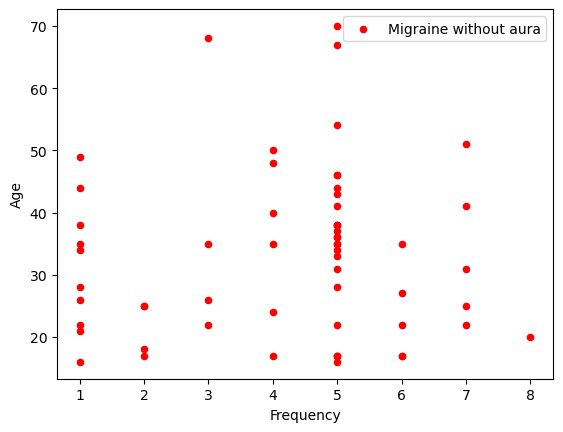

In [25]:
pd_mod_migrane = pd.read_csv("migrane_dataMod.csv")

migraine2_df = pd_mod_migrane[pd_mod_migrane["Type"]==2]

axes = migraine2_df.plot(kind = "scatter", x = "Frequency", y = "Age",
                                         color = "red", label = "Migraine without aura")

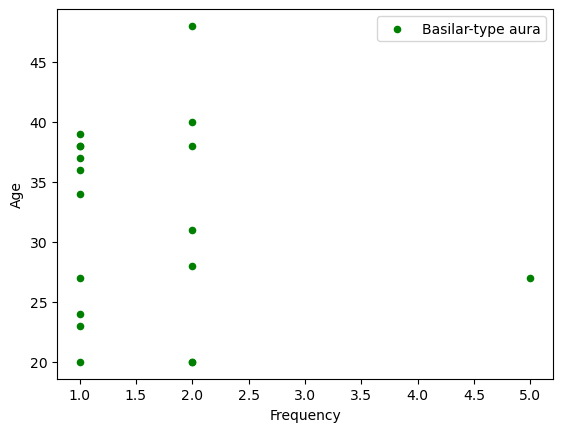

In [12]:
pd_mod_migrane = pd.read_csv("migrane_dataMod.csv")

migraine3_df = pd_mod_migrane[pd_mod_migrane["Type"]==3]

axes = migraine3_df.plot(kind = "scatter", x = "Frequency", y = "Age",
                                         color = "green", label = "Basilar-type aura")

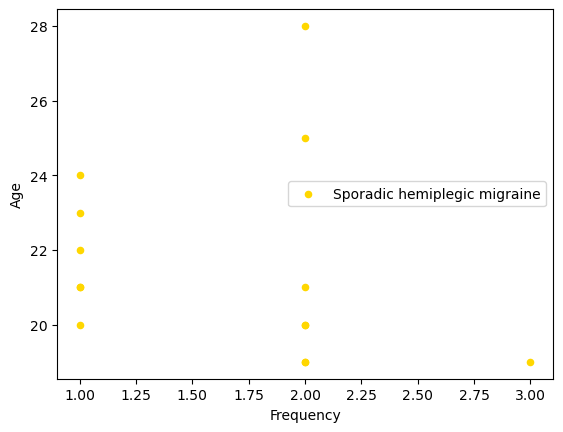

In [15]:
pd_mod_migrane = pd.read_csv("migrane_dataMod.csv")

migraine4_df = pd_mod_migrane[pd_mod_migrane["Type"]==4]

axes = migraine4_df.plot(kind = "scatter", x = "Frequency", y = "Age",
                                         color = "gold", label = "Sporadic hemiplegic migraine")

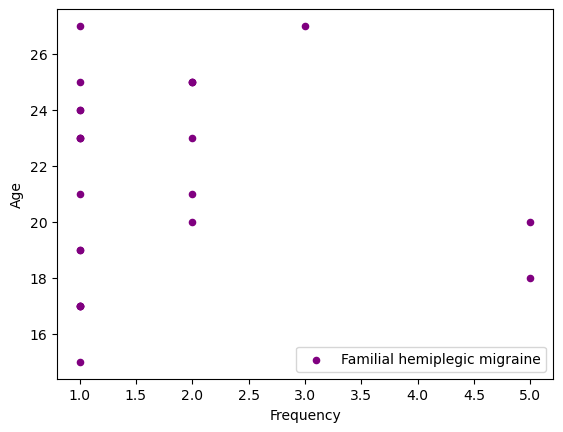

In [16]:
pd_mod_migrane = pd.read_csv("migrane_dataMod.csv")

migraine5_df = pd_mod_migrane[pd_mod_migrane["Type"]==5]

axes = migraine5_df.plot(kind = "scatter", x = "Frequency", y = "Age",
                                         color = "purple", label = "Familial hemiplegic migraine")b

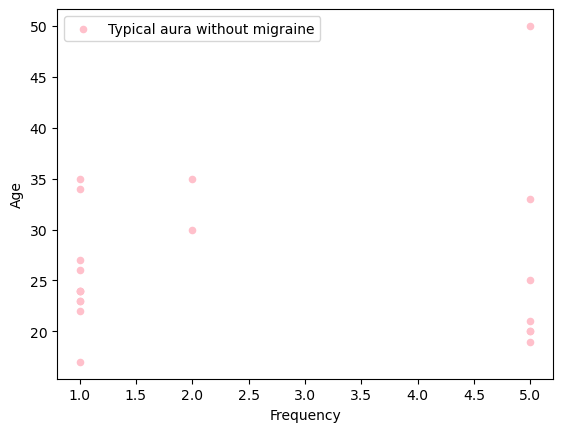

In [19]:
pd_mod_migrane = pd.read_csv("migrane_dataMod.csv")

migraine6_df = pd_mod_migrane[pd_mod_migrane["Type"]==6]

axes = migraine6_df.plot(kind = "scatter", x = "Frequency", y = "Age",
                                         color = "pink", label = "Typical aura without migraine")

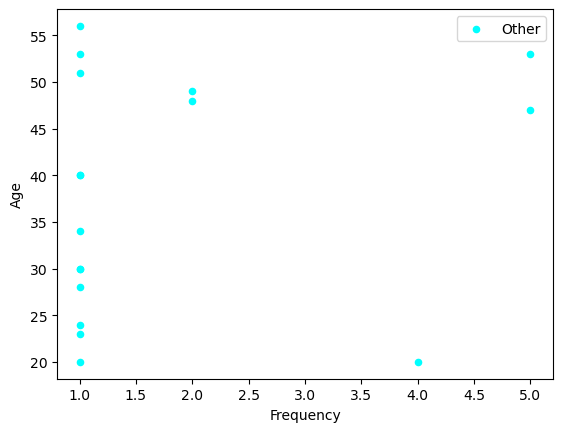

In [20]:
pd_mod_migrane = pd.read_csv("migrane_dataMod.csv")

migraine7_df = pd_mod_migrane[pd_mod_migrane["Type"]==7]

axes = migraine7_df.plot(kind = "scatter", x = "Frequency", y = "Age",
                                         color = "cyan", label = "Other")

<Axes: xlabel='Frequency', ylabel='Age'>

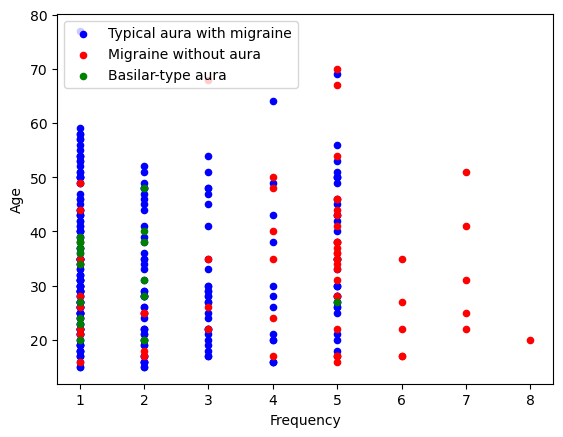

In [27]:
#Combine all types headaches

pd_mod_migrane = pd.read_csv("migrane_dataMod.csv")

#migrane 1

migraine1_df = pd_mod_migrane[pd_mod_migrane["Type"]==1]

axes = migraine1_df.plot(kind = "scatter", x = "Frequency", y = "Age",
                                         color = "blue", label = "Typical aura with migraine")
#migrane 2

migraine2_df = pd_mod_migrane[pd_mod_migrane["Type"]==2]

migraine2_df.plot(kind = "scatter", x = "Frequency", y = "Age",
                                         color = "red", label = "Migraine without aura", ax = axes)

#migrane 3

migraine3_df = pd_mod_migrane[pd_mod_migrane["Type"]==3]

migraine3_df.plot(kind = "scatter", x = "Frequency", y = "Age",
                                         color = "green", label = "Basilar-type aura", ax = axes)

## 3b) Number of points under each column

In [21]:
#see number of sample points in dataset for each column

pd_mod_migrane.count()

Age            400
Duration       400
Frequency      400
Location       400
Character      400
Intensity      400
Nausea         400
Vomit          400
Phonophobia    400
Photophobia    400
Visual         400
Sensory        400
Dysphasia      400
Dysarthria     400
Vertigo        400
Tinnitus       400
Hypoacusis     400
Diplopia       400
Defect         400
Ataxia         400
Conscience     400
Paresthesia    400
DPF            400
Type           400
dtype: int64

In [24]:
#Tally number of each data point under each type of headache
label_num = pd_migrane["Type"].value_counts()

label_num

1    247
2     60
5     24
6     20
3     18
7     17
4     14
Name: Type, dtype: int64